In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import random
import os
import glob

In [63]:
def train(criterion, optimizer, model, num_epochs, device):
    loss_history = []
    test_acc_history = []

    for epoch in range(num_epochs):
        loss_per_epoch = 0
        for images, label in trainloader:
            optimizer.zero_grad()

            images, label = images.to(device), label.to(device)

            outputs = model(images)

            loss = criterion(outputs, label)
            loss.backward()
            optimizer.step()

            loss_per_epoch += loss

        correct = 0
        total = 0

        with torch.no_grad():
            for images, label in testloader:
                images, label = images.to(DEVICE), label.to(DEVICE)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += label.size(0)
                correct += (predicted == label).sum().item()

        print(f"epoch: {epoch}, loss_per_epoch: {loss_per_epoch}, test_accuracy: {correct/total}")
        loss_history.append(loss_per_epoch.cpu().detach().numpy())
        test_acc_history.append((correct * 100/total))

    return loss_history, test_acc_history

In [64]:
DEVICE = torch.device("cuda")

In [65]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./Assignment_2/data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=256, shuffle=True, drop_last = True)

testset = datasets.CIFAR10(root='./Assignment_2/data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=256, shuffle=False, drop_last = True)

Files already downloaded and verified
Files already downloaded and verified


In [66]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(32 * 32 * 3, 8192),
            nn.BatchNorm1d(8192),
            nn.ReLU(inplace=True),
            nn.Linear(8192, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 10),
            
        )
    def forward(self, x):
        x = x.view(256, 32 * 32 * 3)
        x = self.classifier(x)

        return x

In [67]:
model_1 = Linear()
model_1 = model_1.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.0005)

num_epochs = 5

In [68]:
print("model_1 (linear) network training")
loss_history, test_acc_history = train(criterion, optimizer, model_1, num_epochs = num_epochs, device = DEVICE) 

model_1 (linear) network training
epoch: 0, loss_per_epoch: 334.2330627441406, test_accuracy: 0.46464342948717946
epoch: 1, loss_per_epoch: 285.9566650390625, test_accuracy: 0.49238782051282054
epoch: 2, loss_per_epoch: 261.91705322265625, test_accuracy: 0.5143229166666666
epoch: 3, loss_per_epoch: 244.4301300048828, test_accuracy: 0.526542467948718
epoch: 4, loss_per_epoch: 227.813720703125, test_accuracy: 0.535957532051282


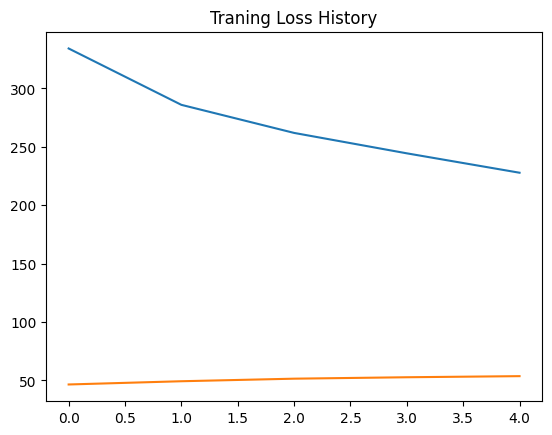

In [69]:
plt.plot(list(range(num_epochs)), loss_history)
plt.plot(list(range(num_epochs)), test_acc_history)
plt.title("Traning Loss History")
plt.show()